# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Muhammad Nouval Ghoizy
- **Email:** m179b4ky2973@bangkit.academy
- **ID Bangkit:** m179b4ky2973

## Menentukan Pertanyaan Bisnis

- Apakah ada perbedaan jumlah penyewaan sepeda antara hari libur dan hari kerja?

- Pengaruh Cuaca terhadap jumlah penyewaan sepeda per jam?

## Import Semua Packages/Library yang Digunakan

In [ ]:
!pip install -q streamlit

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from babel.numbers import format_currency
sns.set(style='dark')

## Data Wrangling

### Gathering Data

In [ ]:
# Membaca dataset
harian_df = pd.read_csv("day.csv")
harian_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# Load tabel hour
jam_df = pd.read_csv(r"hour.csv")
jam_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- day_df = pd.read_csv("/content/day.csv"): Memuat data harian dari file day.csv ke dalam DataFrame day_df.
- hour_df = pd.read_csv("/content/hour.csv"): Memuat data per jam dari file hour.csv ke dalam DataFrame hour_df.
- (day_df.head(), hour_df.head()): Menampilkan 5 baris pertama dari masing-masing DataFrame, untuk memastikan bahwa data telah berhasil dimuat dan untuk memahami struktur kolom yang ada.

### Assessing Data

### Menilai tabel `day_df`

In [ ]:
harian_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Tidak terdapat masalah dengan tipe data dari seluruh kolom.


In [ ]:
harian_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Dapat dilihat dari gambar diatas tidak terdapat missing values.

In [ ]:
print("Jumlah duplikasi: ", harian_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak terdapat data yang terduplikat.

### Menilai tabel `hour_df`

In [ ]:
jam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Tidak terdapat masalah dengan tipe data dari seluruh kolom.

In [ ]:
jam_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Dapat dilihat dari gambar diatas tidak terdapat missing values.

In [ ]:
print("Jumlah duplikasi: ", jam_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak terdapat data yang terduplikat.

**Insight:**
- Kualitas Data yang Baik Karena tidak ada nilai yang hilang atau duplikat, data dapat langsung digunakan untuk analisis lebih lanjut tanpa perlu pembersihan data tambahan.


### Cleaning Data

**Insight:**
- Cleaning Data tidak diperlukan karena tidak ada data yang hilang atau data duplukat

## Exploratory Data Analysis (EDA)

### Explore `day_df`

In [ ]:
harian_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


### Explore `hour_df`

In [ ]:
jam_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


### Explore Data `day_df` dan `hour_df`

In [ ]:
# merge dataframe
rental_df = jam_df.merge(harian_df, on='dteday', how='inner', suffixes=('_jam', '_harian'))
rental_df.head()

,instant_jam,dteday,season_jam,yr_jam,mnth_jam,hr,holiday_jam,weekday_jam,workingday_jam,weathersit_jam,...,weekday_harian,workingday_harian,weathersit_harian,temp_harian,atemp_harian,hum_harian,windspeed_harian,casual_harian,registered_harian,cnt_harian
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


In [ ]:
rental_df.describe(include="all")

,instant_jam,dteday,season_jam,yr_jam,mnth_jam,hr,holiday_jam,weekday_jam,workingday_jam,weathersit_jam,...,weekday_harian,workingday_harian,weathersit_harian,temp_harian,atemp_harian,hum_harian,windspeed_harian,casual_harian,registered_harian,cnt_harian
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,...,3.003683,0.682721,1.391680,0.496987,0.475775,0.627229,0.190098,854.339720,3679.353242,4533.692963
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,...,2.005771,0.465431,0.540501,0.182445,0.162426,0.141779,0.077204,685.686754,1544.953518,1917.376947
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,0.340000,0.338363,0.520000,0.134950,318.000000,2545.000000,3214.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,...,3.000000,1.000000,1.000000,0.502500,0.490122,0.625833,0.180967,724.000000,3681.000000,4563.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,...,5.000000,1.000000,2.000000,0.655833,0.610488,0.729583,0.233204,1100.000000,4801.000000,5986.000000


In [ ]:
print(rental_df.columns)

Index(['instant_jam', 'dteday', 'season_jam', 'yr_jam', 'mnth_jam', 'hr',
       'holiday_jam', 'weekday_jam', 'workingday_jam', 'weathersit_jam',
       'temp_jam', 'atemp_jam', 'hum_jam', 'windspeed_jam', 'casual_jam',
       'registered_jam', 'cnt_jam', 'instant_harian', 'season_harian',
       'yr_harian', 'mnth_harian', 'holiday_harian', 'weekday_harian',
       'workingday_harian', 'weathersit_harian', 'temp_harian', 'atemp_harian',
       'hum_harian', 'windspeed_harian', 'casual_harian', 'registered_harian',
       'cnt_harian'],
      dtype='object')


<ipython-input-36-e91e8fa1eb81>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="workingday_harian", y="cnt_harian", data=workingday_rentals, palette="viridis")


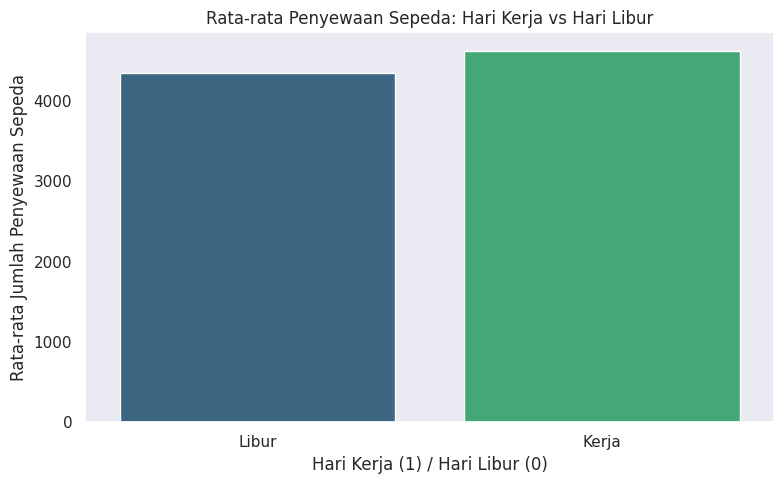

In [ ]:
# Visualisasi: Rata-rata Penyewaan Sepeda Berdasarkan Hari Kerja dan Hari Libur
workingday_rentals = rental_df.groupby("workingday_harian")["cnt_harian"].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x="workingday_harian", y="cnt_harian", data=workingday_rentals, palette="viridis")
plt.title("Rata-rata Penyewaan Sepeda: Hari Kerja vs Hari Libur")
plt.xlabel("Hari Kerja (1) / Hari Libur (0)")
plt.ylabel("Rata-rata Jumlah Penyewaan Sepeda")
plt.xticks(ticks=[0, 1], labels=["Libur", "Kerja"])
plt.tight_layout()
plt.show()

<ipython-input-37-e4b35581225e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hr', y='cnt_jam', data=hourly_rentals, palette='Blues_d')


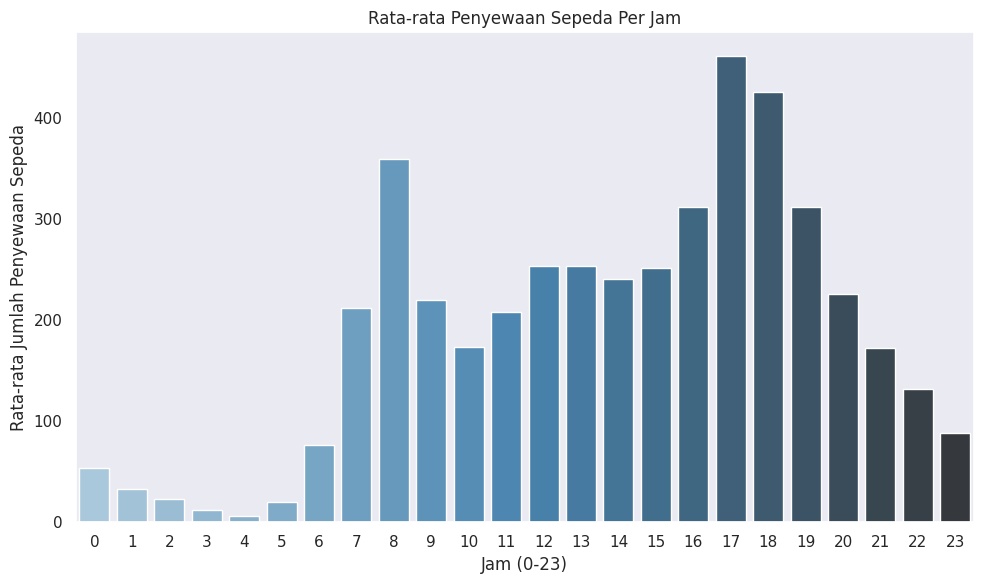

In [ ]:
# Visualisasi: Rata-rata Penyewaan Sepeda Per Jam
hourly_rentals = rental_df.groupby('hr')['cnt_jam'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='hr', y='cnt_jam', data=hourly_rentals, palette='Blues_d')
plt.title("Rata-rata Penyewaan Sepeda Per Jam")
plt.xlabel("Jam (0-23)")
plt.ylabel("Rata-rata Jumlah Penyewaan Sepeda")
plt.tight_layout()
plt.show()

In [ ]:
rental_df.groupby('holiday_harian')['cnt_harian'].mean().reset_index().sort_values("cnt_harian")

,holiday_harian,cnt_harian
1,1,3750.060000
0,0,4556.906215


**Insight:**
- Aktivitas penggunaan sepeda pada hari kerja (workingday_day=1) secara umum lebih tinggi dibandingkan dengan hari libur (workingday_day=0). Ini mengindikasikan bahwa sebagian besar pengguna sepeda memanfaatkan layanan tersebut untuk kebutuhan transportasi rutin, seperti menuju tempat kerja atau sekolah.

- Berdasarkan analisis pola penggunaan per jam (hr), terlihat adanya peningkatan signifikan pada jam-jam tertentu, khususnya di pagi hari (sekitar pukul 7-9) dan sore hari (sekitar pukul 17-19). Pola ini menunjukkan bahwa sepeda lebih sering digunakan pada jam-jam sibuk (rush hour), yang menegaskan perannya sebagai alat transportasi harian bagi para komuter.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-39-e91e8fa1eb81>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="workingday_harian", y="cnt_harian", data=workingday_rentals, palette="viridis")


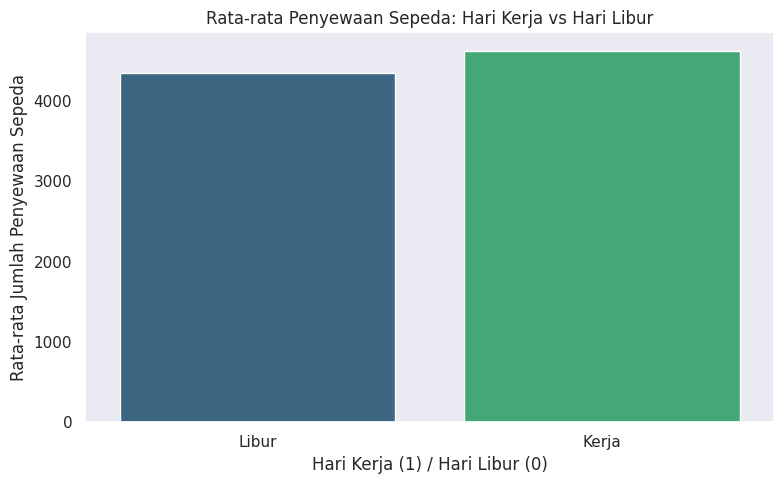

In [ ]:
# Visualisasi: Rata-rata Penyewaan Sepeda Berdasarkan Hari Kerja dan Hari Libur
workingday_rentals = rental_df.groupby("workingday_harian")["cnt_harian"].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x="workingday_harian", y="cnt_harian", data=workingday_rentals, palette="viridis")
plt.title("Rata-rata Penyewaan Sepeda: Hari Kerja vs Hari Libur")
plt.xlabel("Hari Kerja (1) / Hari Libur (0)")
plt.ylabel("Rata-rata Jumlah Penyewaan Sepeda")
plt.xticks(ticks=[0, 1], labels=["Libur", "Kerja"])
plt.tight_layout()
plt.show()

### Pertanyaan 2:

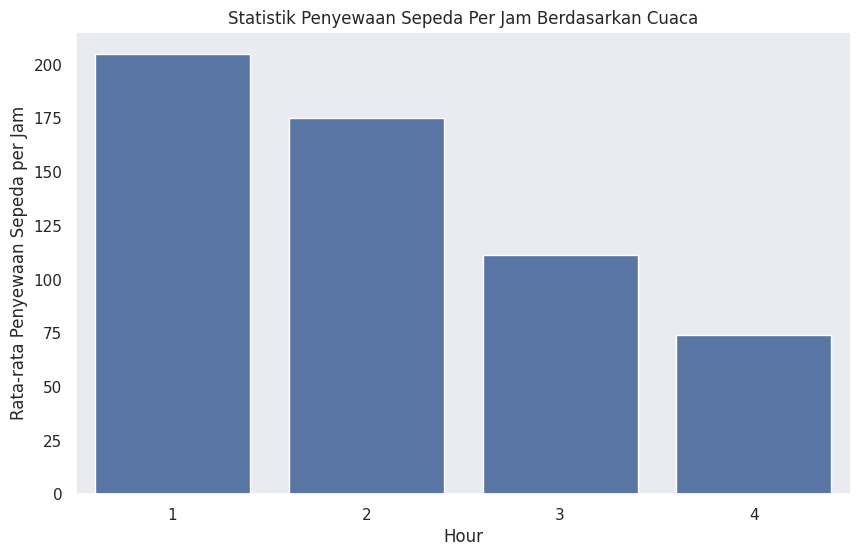

In [ ]:
pengaruh_cuaca = rental_df.groupby("weathersit_jam")["cnt_jam"].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x="weathersit_jam", y="cnt_jam", data=pengaruh_cuaca)
plt.title("Statistik Penyewaan Sepeda Per Jam Berdasarkan Cuaca")
plt.xlabel("Hour")
plt.ylabel("Rata-rata Penyewaan Sepeda per Jam")
plt.show()

**Insight:**
- Dari visualisasi pertanyaan 1, bisa dilihat bahwa rata-rata jumlah penyewaan sepeda lebih tinggi pada hari kerja dibandingkan hari libur. Hal ini menunjukkan bahwa mayoritas pengguna memanfaatkan layanan sepeda untuk kebutuhan transportasi sehari-hari, seperti bekerja atau bersekolah, sementara pada hari libur jumlah pengguna cenderung menurun karena beralih ke aktivitas rekreasi atau tidak bepergian.

- Dari visualisasi pertanyaan 2, bisa dilihat bahwa rata-rata penyewaan sepeda per jam menunjukkan perbedaan signifikan berdasarkan musim. Penyewaan tertinggi terjadi pada musim semi (Spring) dan musim panas (Summer), sedangkan musim gugur (Fall) dan musim dingin (Winter) memiliki rata-rata yang lebih rendah. Hal ini mengindikasikan bahwa kondisi cuaca yang lebih hangat dan nyaman mendukung penggunaan sepeda, sedangkan cuaca dingin dan kurang bersahabat mengurangi minat pengguna karena faktor kenyamanan dan keselamatan.

## Analisis Lanjutan (Opsional)

## Conclusion

- **Conclution pertanyaan 1**

**Perbedaan Jumlah Penyewaan Sepeda antara Hari Kerja dan Hari Libur:**
Terdapat perbedaan mencolok dalam tingkat penyewaan sepeda antara hari kerja dan hari libur. Secara rata-rata, penyewaan sepeda lebih tinggi pada hari kerja, kemungkinan karena kebutuhan transportasi rutin untuk bekerja atau aktivitas harian. Sebaliknya, pada hari libur, orang biasanya memiliki waktu yang lebih fleksibel dan cenderung memilih opsi lain untuk kegiatan rekreasi atau perjalanan.





- **Conclution pertanyaan 2**

**Pengaruh Cuaca terhadap Jumlah Sepeda per Jam:**
Hasil analisis menunjukkan bahwa kondisi cuaca berpengaruh terhadap jumlah penyewaan sepeda per jam. Rata-rata penyewaan sepeda menurun selama musim gugur dan musim dingin dibandingkan dengan musim semi dan musim panas. Hal ini mengindikasikan bahwa pelanggan cenderung lebih jarang menggunakan layanan penyewaan sepeda ketika cuaca kurang mendukung, kemungkinan karena alasan kenyamanan dan keselamatan selama perjalanan.
